**Digit recognizer**

**Data**: MNIST dataset

**Goal**: Build a deep learning model to predict a which number a hand written digit is. 

**By using Pytorch**

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
import random
import torch.nn.functional as F

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(784,30)
        self.fc2=nn.Linear(30,10)
    def forward(self,x):
        l1=self.fc1(x)
        al1=torch.sigmoid(l1)
        l2=self.fc2(al1)
        al2=torch.sigmoid(l2)
        return al2
    

In [3]:
def train(model,use_cuda,train_loader,optimizer,epoch):
    model.train()
    for batchid,(data,target) in enumerate(train_loader):
        y_onehot = torch.zeros([target.shape[0], 10])  # Zero vector of shape [batch_size, 10]
        y_onehot[range(target.shape[0]), target] = 1

        data = data.view([data.shape[0], 784]) # [batch_size,784]
        if use_cuda:
            data,y_onehot=data.cuda(),y_onehot.cuda()
        optimizer.zero_grad()
        output=model(data)
        loss=torch.mean((output-y_onehot)**2)
        loss.backward()
        optimizer.step()
        if batchid % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batchid * len(data), len(train_loader.dataset),
            100. * batchid / len(train_loader), loss.item()))

In [4]:
def test(model,use_cuda,test_loader):
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
        for data,target in test_loader:
            data=data.reshape([data.shape[0],784])
            y_onehot=torch.zeros([target.shape[0],10])
            y_onehot[range(target.shape[0]),target]=1
            if use_cuda:
                data,y_onehot=data.cuda(),y_onehot.cuda()
            output=model(data)
            test_loss+=torch.sum((output-y_onehot)**2)
            pred=output.argmax(dim=1,keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item() 
        test_loss/=len(test_loader.dataset)
        print(test_loss,100*correct/len(test_loader.dataset))

In [5]:
def seed(seed_value):
    torch.cuda.manual_seed_all(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed(seed_value)
    np.random.seed(seed_value)
    random.seed(seed_value)
    torch.backends.cudnn.benchmark=False
    torch.backends.cudnn.deterministic=True

In [7]:
def main():
    use_cuda=False
    seed(0)
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,),(0.3081,))
    ])#normalizing and transforming data to tensor
    data1=datasets.MNIST('../data',download=True,train=True,transform=transform)
    data2=datasets.MNIST('../data',train=False,transform=transform)
    #loading data using torch's inbuilt dataloader
    train_loader=torch.utils.data.DataLoader(data1,num_workers=6,batch_size=64,shuffle=True)
    test_loader=torch.utils.data.DataLoader(data2,num_workers=6,batch_size=1000,shuffle=False)
    model=Net()
    if use_cuda:
        model=model.cuda()
    optimizer=optim.SGD(model.parameters(),lr=10)
    for epoch in range(1,11):
        train(model,use_cuda,train_loader,optimizer,epoch)
        test(model,use_cuda,test_loader)
    torch.save(model.state_dict(),"mnist_cnn.pt")  #saving the model
    model.load_state_dict(torch.load("mnist_cnn.pt"))

In [8]:
if __name__=="__main__":
    main()

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.285145
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.035109
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.022455
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.016793
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.017698
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.021430
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.014029
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.008732
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.013671
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.016153
tensor(0.1293) 92.58
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.008964
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.006504
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.009314
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.004609
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.013835
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.021412
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.010659
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.004104
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.009219
Train Epoch: 2 [57600/60000 (96%)]	Loss: 

**Using Keras to build a NN model**

In [9]:
import tensorflow

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation

In [2]:
from keras.datasets import mnist

In [12]:
from keras.utils import np_utils

In [3]:
(xt,yt),(xte,yte)=mnist.load_data()

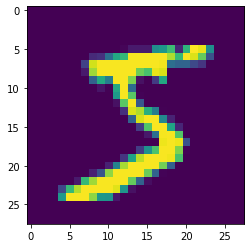

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xt[0])
plt.show()

In [14]:
xt=xt.reshape(60000,784).astype('float32')
xte=xte.reshape(10000,784).astype('float32')
xt/=255
xte/=255

In [15]:
nb_classes = 10 # number of unique digits

Yt= np_utils.to_categorical(yt, nb_classes)
Yte = np_utils.to_categorical(yte, nb_classes)

In [16]:
model=Sequential()                        #Linear stacking of layers

model.add(Dense(512,input_shape=(784,)))  #First layer with 512 nodes
model.add(Activation('relu'))             #Relu activation function 

model.add(Dense(50))                      #second layer with 50 nodes
model.add(Activation('relu'))             #relu activation layer
model.add(Dropout(0.2))                   #20% dropout of randomly selected nodes

model.add(Dense(10))                      #Final layer with 10 nodes and
model.add(Activation('softmax'))          #softmax activation function

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25650     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(x=xt,y=yt,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 34s 7ms/step - loss: 0.4773 - accuracy: 0.8537
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1155 - accuracy: 0.9656
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0761 - accuracy: 0.9777
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0563 - accuracy: 0.9824
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0404 - accuracy: 0.9873
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0348 - accuracy: 0.9896
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0295 - accuracy: 0.9900
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0227 - accuracy: 0.9925
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 10/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0157 - accuracy: 0.994

In [20]:
score = model.evaluate(xte,yte)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 3ms/step - loss: 0.0716 - accuracy: 0.9832
Test score: 0.07161170989274979
Test accuracy: 0.9832000136375427


**Adding convolution and maxpooling layers**

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [24]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [25]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)       

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [29]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [30]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
468/468 [==============================] - 128s 247ms/step - loss: 0.2829 - accuracy: 0.9078 - val_loss: 0.0657 - val_accuracy: 0.9812
Epoch 2/5
468/468 [==============================] - 113s 241ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 3/5
468/468 [==============================] - 112s 240ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0925 - val_accuracy: 0.9693
Epoch 4/5
468/468 [==============================] - 112s 240ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0428 - val_accuracy: 0.9869
Epoch 5/5
468/468 [==============================] - 110s 235ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0201 - val_accuracy: 0.9930


In [31]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.0201 - accuracy: 0.9930 0s - loss: 0.0195 - accu
Test score: 0.02006812021136284
Test accuracy: 0.9929999709129333
